# Log loss: Handling the trade-off between accuracy and confidence.

In the study where a number of estimators were compared based on their prediction probabilities, it was realised that a model can be seen to have a high accuracy and very poor prediction quality at the same time. Accuracy is simply a measure of how many row labels(target variables) were gotten right. However, in the case of an imbalanced data set, the accuracy is largely dependent on the majority class and it is a poor indicator of the performance of the model.

It was, therefore, imperative that a new metric be sought for. Logarithmic loss, commonly known as a loss function, handles the trade-off between accuracy and confidence.
Mathematically, 
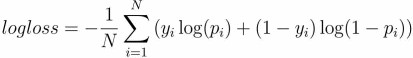

- N = Number of observations(rows) in the data set.
- y = Actual target variable value of the observation (0 or 1)
- p = Probability that the target variable value is 1.

The log loss of the estimator on the full data set is the mean of the log losses of all the observations in that data set.
This function is converted to code in the compare_estimators module and its behaviour is observed in this study.

In [1]:
from compare_estimators import compute_log_loss
import numpy as np

Demonstration 1 :Confident and wrong

In [2]:
compute_log_loss(predicted=0.9, actual=0)

2.302585092994046

Demonstration 2: Unsure and right

In [3]:
compute_log_loss(0.5,1)

0.6931471805599453

The performance is better (that is, log loss is lesser) when the model is right than when it is wrong and confident. Log loss emphasizes that the prediction should be right.

## Interpreting the log loss value.

A number of arrays are formed which are used to simulate the behaviour of log loss in all possible performance scenarios.

In [4]:
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])

In [5]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


The performance preferences of log loss, from greatest to least are:
* correct and confident.
* correct and unsure.
* wrong and unsure.
* wrong and confident.

## Application

In the case of a dataset, the `predicted` parameter values are the second column of the result of applying predict_proba() on the data set. That is, the probabilities that the target variable value is 1.
On the other hand, the `actual` parameter values are equal to the `target_test` partition of `train_test_split`.